In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls /gws/open/Student/citibike

201307-citibike-tripdata.zip  201508-citibike-tripdata.zip
201308-citibike-tripdata.zip  201509-citibike-tripdata.zip
201309-citibike-tripdata.zip  201510-citibike-tripdata.zip
201310-citibike-tripdata.zip  201511-citibike-tripdata.zip
201311-citibike-tripdata.zip  201512-citibike-tripdata.zip
201312-citibike-tripdata.zip  201601-citibike-tripdata.zip
201401-citibike-tripdata.zip  201602-citibike-tripdata.zip
201402-citibike-tripdata.zip  201603-citibike-tripdata.zip
201403-citibike-tripdata.zip  201604-citibike-tripdata.zip
201404-citibike-tripdata.zip  201605-citibike-tripdata.zip
201405-citibike-tripdata.zip  201606-citibike-tripdata.zip
201406-citibike-tripdata.zip  201607-citibike-tripdata.zip
201407-citibike-tripdata.zip  201608-citibike-tripdata.zip
201408-citibike-tripdata.zip  201609-citibike-tripdata.zip
201409-citibike-tripdata.zip  201610-citibike-tripdata.zip
201410-citibike-tripdata.zip  201611-citibike-tripdata.zip
201411-citibike-tripdata.zip  201612-citibike-tripdata.z

# Read in data

In [19]:
datestring1 = "201501"
df1 = pd.read_csv('/gws/open/Student/citibike' + "/" + datestring1 + '-citibike-tripdata.zip', compression='zip')
df1['date'] = pd.to_datetime(df1['starttime'], infer_datetime_format=True)
df1.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
285547,169,1/31/2015 23:57,2/1/2015 0:00,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,368,Carmine St & 6 Ave,40.730386,-74.002150,17456,Subscriber,1956.0,1,2015-01-31 23:57:00
285548,827,1/31/2015 23:58,2/1/2015 0:12,252,MacDougal St & Washington Sq,40.732264,-73.998522,440,E 45 St & 3 Ave,40.752554,-73.972826,17669,Subscriber,1976.0,1,2015-01-31 23:58:00
285549,798,1/31/2015 23:58,2/1/2015 0:11,127,Barrow St & Hudson St,40.731724,-74.006744,433,E 13 St & Avenue A,40.729554,-73.980572,20237,Subscriber,1994.0,1,2015-01-31 23:58:00
285550,725,1/31/2015 23:58,2/1/2015 0:10,435,W 21 St & 6 Ave,40.741740,-73.994156,368,Carmine St & 6 Ave,40.730386,-74.002150,21029,Subscriber,1957.0,1,2015-01-31 23:58:00
285551,892,1/31/2015 23:59,2/1/2015 0:14,504,1 Ave & E 15 St,40.732219,-73.981656,295,Pike St & E Broadway,40.714067,-73.992939,18342,Subscriber,1974.0,1,2015-01-31 23:59:00


In [20]:
datestring2 = "201507"
df2 = pd.read_csv('/gws/open/Student/citibike' + "/" + datestring2 + '-citibike-tripdata.zip', compression='zip')
df2['date'] = pd.to_datetime(df2['starttime'], infer_datetime_format=True)
df2.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
1085671,275,7/31/2015 23:59:40,8/1/2015 00:04:15,383,Greenwich Ave & Charles St,40.735238,-74.000271,404,9 Ave & W 14 St,40.740583,-74.005509,22667,Subscriber,1987.0,1,2015-07-31 23:59:40
1085672,530,7/31/2015 23:59:41,8/1/2015 00:08:32,455,1 Ave & E 44 St,40.750020,-73.969053,507,E 25 St & 2 Ave,40.739126,-73.979738,20640,Subscriber,1960.0,1,2015-07-31 23:59:41
1085673,273,7/31/2015 23:59:42,8/1/2015 00:04:15,383,Greenwich Ave & Charles St,40.735238,-74.000271,404,9 Ave & W 14 St,40.740583,-74.005509,22134,Customer,NaN,0,2015-07-31 23:59:42
1085674,1273,7/31/2015 23:59:56,8/1/2015 00:21:09,477,W 41 St & 8 Ave,40.756405,-73.990026,432,E 7 St & Avenue A,40.726218,-73.983799,22861,Subscriber,1986.0,1,2015-07-31 23:59:56
1085675,1667,7/31/2015 23:59:59,8/1/2015 00:27:46,2021,W 45 St & 8 Ave,40.759291,-73.988597,401,Allen St & Rivington St,40.720196,-73.989978,16458,Subscriber,1988.0,1,2015-07-31 23:59:59


In [21]:
df = pd.concat([df1, df2])
dfbackup = pd.concat([df1, df2])
len(df)

1371228

In [22]:
df.drop(['stoptime', 'start station name', 'start station latitude',
      'start station longitude', 'end station id', 'end station name',
      'end station latitude', 'end station longitude', 'bikeid',
       ], axis=1, inplace=True)

In [23]:
df.head()

,tripduration,starttime,start station id,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,455,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,434,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,491,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,384,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,474,Subscriber,1977.0,1,2015-01-01 00:05:00


In [24]:
dfDur = df

---

# Trip Duration against Time of Day

## KS Tests

### $H_0$: The two samples come from a common distribution 

$ \alpha = 0.05 $


In [25]:
dfDur['hour'] = dfDur['date'].dt.hour

dfDur.head()    

,tripduration,starttime,start station id,usertype,birth year,gender,date,hour
0,1346,1/1/2015 0:01,455,Subscriber,1960.0,2,2015-01-01 00:01:00,0
1,363,1/1/2015 0:02,434,Subscriber,1963.0,1,2015-01-01 00:02:00,0
2,346,1/1/2015 0:04,491,Subscriber,1974.0,1,2015-01-01 00:04:00,0
3,182,1/1/2015 0:04,384,Subscriber,1969.0,1,2015-01-01 00:04:00,0
4,969,1/1/2015 0:05,474,Subscriber,1977.0,1,2015-01-01 00:05:00,0


In [26]:
dfDur['daytrip'] = np.where((dfDur['hour'] > 5) & (dfDur['hour']<18), 'day' , 'night')
dfDur.head()

,tripduration,starttime,start station id,usertype,birth year,gender,date,hour,daytrip
0,1346,1/1/2015 0:01,455,Subscriber,1960.0,2,2015-01-01 00:01:00,0,night
1,363,1/1/2015 0:02,434,Subscriber,1963.0,1,2015-01-01 00:02:00,0,night
2,346,1/1/2015 0:04,491,Subscriber,1974.0,1,2015-01-01 00:04:00,0,night
3,182,1/1/2015 0:04,384,Subscriber,1969.0,1,2015-01-01 00:04:00,0,night
4,969,1/1/2015 0:05,474,Subscriber,1977.0,1,2015-01-01 00:05:00,0,night


### For the sake of this experiment, I have determined day-trips begin between the hours of 6am and 6pm, and night-trips begin between the hours of 6pm and 6am

In [27]:
dfDur_day = df[dfDur.daytrip == 'day']
dfDur_night = df[dfDur.daytrip == 'night']

In [28]:
day_val = dfDur_day['tripduration'].values
night_val = dfDur_night['tripduration'].values
n_day = len(day_val)
n_night = len(night_val)

## KS Statistic, full sample

In [29]:
scipy.stats.ks_2samp(day_val, night_val)

Ks_2sampResult(statistic=0.022754872040973356, pvalue=1.8980926024220832e-135)

### The resulting statistic tells us the maximum distance between the two cumulative distribution functions (CDFs). Because it is so small (0.02), it is likely that the samples were pulled from the same parent distribution. Even though the p-value is extremely small (and significantly smaller than our signifigance level of 0.05), we cannot reject $H_0$

## KS Statistic, N/200

In [30]:
small_sample_day = (len(dfDur_day))/200
small_sample_night = (len(dfDur_night))/200

dfSmall_day = dfDur_day.sample(small_sample_day, random_state=4)
dfSmall_night = dfDur_night.sample(small_sample_night, random_state=4)

print(len(dfSmall_day) + len(dfSmall_night))

6855


In [31]:
day_val_small = dfSmall_day['tripduration'].values
night_val_small = dfSmall_night['tripduration'].values

scipy.stats.ks_2samp(day_val_small, night_val_small)

Ks_2sampResult(statistic=0.025902105393991737, pvalue=0.26324082828414525)

### Using a smaller sample size, the resulting statistic, 0.02, indicates that there is a small distance between the CDFs for both distributions. Considering the fact that our p-value is larger than our significance threshhold of 0.05, we cannot reject $H_0$, implying that it is likely both samples are pulled from the same parent distribution

---

# Testing for Correlation 

### $H_0$: There is no statistical significant corellation between the start time and the duration of a Citibike trip
 
$ \alpha = 0.05 $

## Pearson's Test

In [32]:
np.random.seed(70)
Cor_day = np.random.choice(dfDur_day['tripduration'], size=20000)
Cor_night = np.random.choice(dfDur_night['tripduration'], size=20000)
Day_sort = np.sort(Cor_day)
Night_sort = np.sort(Cor_night)

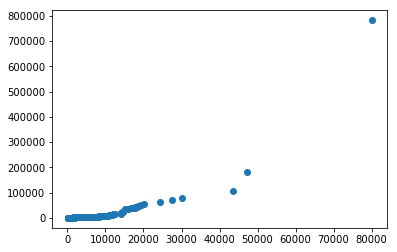

In [33]:
plt.scatter(Day_sort, Night_sort)

In [34]:
scipy.stats.pearsonr(Day_sort , Night_sort)

(0.70360355333491498, 0.0)

### Based on the Pearson correlation coefficient (0.70), there is a strong correlation between trip length for trips beginning during the day and trips beginning during the night. Because our p-value is very small, we can assume that the correlation coefficient is significant. Thus, we can reject $H_0$

## Spearman's Test

In [35]:
scipy.stats.spearmanr(Day_sort, Night_sort)

SpearmanrResult(correlation=0.99999924708305776, pvalue=0.0)

### Being that the p-value is seemingly small, and the correlation coefficient implies that there is a near perfect correlation, we can reject $H_0$ 

---

-----------------------

# Borough of Origin against Age

### $H_0$: The two samples come from a common distribution 

$ \alpha = 0.05 $

In [36]:
dfAge = dfbackup
dfAge['age'] = 2015 - df['birth year']
dfAge['age'].dropna(inplace= True)
dfAge.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,age
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,55.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,52.0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,41.0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,46.0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,38.0


In [37]:
dfAge.drop(['tripduration', 'starttime', 'stoptime', 'end station id', 'end station name',
      'end station latitude', 'end station longitude', 'bikeid', 'gender'
       ], axis=1, inplace=True)

In [38]:
dfAge.head()

,start station id,start station name,start station latitude,start station longitude,usertype,birth year,date,age
0,455,1 Ave & E 44 St,40.750020,-73.969053,Subscriber,1960.0,2015-01-01 00:01:00,55.0
1,434,9 Ave & W 18 St,40.743174,-74.003664,Subscriber,1963.0,2015-01-01 00:02:00,52.0
2,491,E 24 St & Park Ave S,40.740964,-73.986022,Subscriber,1974.0,2015-01-01 00:04:00,41.0
3,384,Fulton St & Waverly Ave,40.683178,-73.965964,Subscriber,1969.0,2015-01-01 00:04:00,46.0
4,474,5 Ave & E 29 St,40.745168,-73.986831,Subscriber,1977.0,2015-01-01 00:05:00,38.0


In [39]:
dfAge['borough'] = ""
dfAge.head()

,start station id,start station name,start station latitude,start station longitude,usertype,birth year,date,age,borough
0,455,1 Ave & E 44 St,40.750020,-73.969053,Subscriber,1960.0,2015-01-01 00:01:00,55.0,
1,434,9 Ave & W 18 St,40.743174,-74.003664,Subscriber,1963.0,2015-01-01 00:02:00,52.0,
2,491,E 24 St & Park Ave S,40.740964,-73.986022,Subscriber,1974.0,2015-01-01 00:04:00,41.0,
3,384,Fulton St & Waverly Ave,40.683178,-73.965964,Subscriber,1969.0,2015-01-01 00:04:00,46.0,
4,474,5 Ave & E 29 St,40.745168,-73.986831,Subscriber,1977.0,2015-01-01 00:05:00,38.0,


In [40]:
#Determining Boroughs 

#Anything greater than 40.739246 is Manhattan
dfAge.loc[dfAge['start station latitude'] > 40.739246, 'borough'] = 'Manhattan'

#Anything less than 40.700420 is Brooklyn
dfAge.loc[dfAge['start station latitude'] < 40.700420, 'borough'] = 'Brooklyn'

#Anything less than 40.738868 and greater than -73.971104 is Brooklyn
dfAge.loc[(dfAge['start station latitude'] < 40.738868) & (dfAge['start station longitude'] > -73.971104), 'borough'] = 'Brooklyn'

#Anything greater than 40.710150 and less than  -73.971778 is Manhattan
dfAge.loc[(dfAge['start station latitude'] > 40.710150) & (dfAge['start station longitude'] < -73.971778), 'borough'] = 'Manhattan'

#Anything greater than 40.700040 and less than -74.000767 is Manhattan
dfAge.loc[(dfAge['start station latitude'] > 40.700040) & (dfAge['start station longitude'] < -74.000767), 'borough'] = 'Manhattan'

#Anything less than 40.707762 and greater than -73.998355 is Brooklyn
dfAge.loc[(dfAge['start station latitude'] < 40.707762) & (dfAge['start station longitude'] > -73.998355), 'borough'] = 'Brooklyn'

dfAge.head()
#dfBor = dfAge
#type(dfBor)

,start station id,start station name,start station latitude,start station longitude,usertype,birth year,date,age,borough
0,455,1 Ave & E 44 St,40.750020,-73.969053,Subscriber,1960.0,2015-01-01 00:01:00,55.0,Manhattan
1,434,9 Ave & W 18 St,40.743174,-74.003664,Subscriber,1963.0,2015-01-01 00:02:00,52.0,Manhattan
2,491,E 24 St & Park Ave S,40.740964,-73.986022,Subscriber,1974.0,2015-01-01 00:04:00,41.0,Manhattan
3,384,Fulton St & Waverly Ave,40.683178,-73.965964,Subscriber,1969.0,2015-01-01 00:04:00,46.0,Brooklyn
4,474,5 Ave & E 29 St,40.745168,-73.986831,Subscriber,1977.0,2015-01-01 00:05:00,38.0,Manhattan


### The filters used above to identify the borough are not perfect. While they accurately separate stations in Manhattan from stations in Brooklyn, the filters include some stations in other boroughs. With more time, I would further delineate the margins of the boroughs in order to have a more accurate representation

In [41]:
dfBor_M = df[dfAge.borough == 'Manhattan']
dfBor_B = df[dfAge.borough == 'Brooklyn']

## KS Statistic, full sample


In [42]:
dfBor_M['age'] = 2015 - dfBor_M['birth year']
dfBor_B['age'] = 2015 - dfBor_B['birth year']

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [43]:
Clean_M = dfBor_M.dropna()
Clean_B = dfBor_B.dropna()
print(len(dfBor_M))
print(len(dfBor_B))

1278259
92969


In [44]:
M_val = Clean_M['age'].values
B_val = Clean_B['age'].values

scipy.stats.ks_2samp(M_val, B_val)

Ks_2sampResult(statistic=0.10770895578010363, pvalue=0.0)

### The resulting statistic tells us the maximum distance between the two cumulative distribution functions (CDFs). Because it is small (0.10), it is likely that the samples were pulled from the same parent distribution. Even though the p-value is seemingly small, we cannot reject $H_0$

## KS Statistic, N/200

In [45]:
small_sample_M = (len(Clean_M))/200
small_sample_B = (len(Clean_B))/200

dfSmall_M = Clean_M.sample(small_sample_M, random_state=4)
dfSmall_B = Clean_B.sample(small_sample_B, random_state=4)

print(len(dfSmall_M) + len(dfSmall_B))

5925


In [46]:
M_val_small = dfSmall_M['age'].values
B_val_small = dfSmall_B['age'].values

scipy.stats.ks_2samp(M_val_small, B_val_small)

Ks_2sampResult(statistic=0.15759861162325942, pvalue=5.4301268558691229e-08)

### Using a smaller sample size, the resulting statistic, 0.15, indicates that there is a small distance between the CDFs for both distributions. Though our p-value is much smaller than our significance threshhold of 0.05, we cannot reject $H_0$, implying that it is likely both samples are pulled from the same parent distribution

---

# Testing for Correlation 

### $H_0$: There is no statistical significant corellation between the borough of origin and age of Citibike riders
 
$ \alpha = 0.05 $

## Pearson's Test

In [47]:
np.random.seed(70)
Cor_M = np.random.choice(Clean_M['age'], size=20000)
Cor_B = np.random.choice(Clean_B['age'], size=20000)
Sort_M = np.sort(Cor_M)
Sort_B = np.sort(Cor_B)

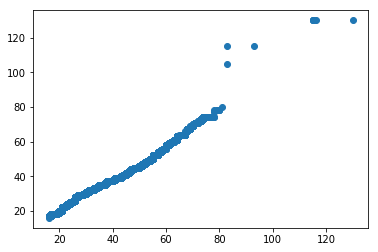

In [48]:
plt.scatter(Sort_M, Sort_B)

In [49]:
scipy.stats.pearsonr(Sort_M, Sort_B)

(0.99205409440602543, 0.0)

### Based on the Pearson correlation coefficient (0.99), there is a near perfect correlation between the age of riders beginning in Manhattan and riders beginning in Brooklyn. Because our p-value is seemingly small, we can assume that the correlation coefficient is significant. Thus, we can reject $H_0$

## Spearman's Test

In [50]:
scipy.stats.spearmanr(Sort_M, Sort_B)

SpearmanrResult(correlation=0.99899147775638864, pvalue=0.0)

### Being that the p-value is seemingly small, and the correlation coefficient implies that there is a near perfect correlation, we can reject $H_0$ 